<a href="https://colab.research.google.com/github/vishalsingh1080/endToend_Emotion_detection/blob/main/inference_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
frame = cv2.imread('/content/gdrive/My Drive/emotion_detection/test_img2.jpg')

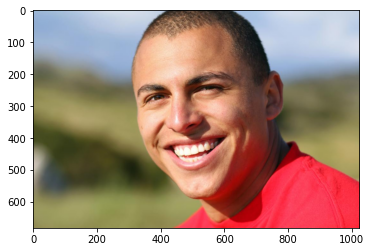

In [4]:
frame_color = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(frame_color)

In [5]:
facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [6]:
faces = facecascade.detectMultiScale(frame_color,1.1,4)
for x,y,w,h in faces:
    #roi_gray = gray[y:y+h,x:x+w]
    roi_color = frame_color[y:y+h,x:x+w]
    cv2.rectangle(frame_color,(x,y),(x+w,y+h),(255,0,0),2)
    faces1 = facecascade.detectMultiScale(roi_color)
    for (ex,ey,ew,eh) in faces1:
         face_roi = roi_color[ey: ey+eh,ex: ex+ew]   

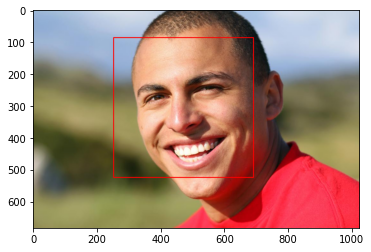

In [7]:
plt.imshow(frame_color)

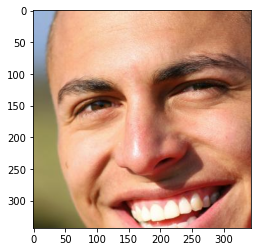

In [8]:
plt.imshow(face_roi)

In [9]:
face_roi.shape

(343, 343, 3)

In [10]:
def normalize(x):
    return (x.astype(float) - 128) / 128

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


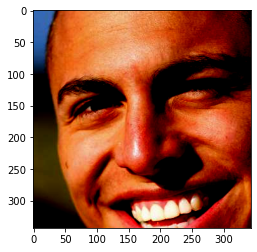

In [11]:
# print(type(face_roi))
face_roi = normalize(face_roi)
plt.imshow(face_roi)

In [12]:
face_roi.shape

(343, 343, 3)

In [13]:
final_img = cv2.resize(face_roi,(197,197))
final_img.shape

(197, 197, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'numpy.ndarray'>


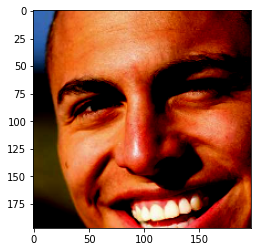

In [14]:
print(type(final_img))
plt.imshow(final_img)
plt.show()

In [15]:
model = load_model('/content/gdrive/My Drive/emotion_detection/VGG16-global.h5')

In [16]:
classes = {0:'angry',1:'disgust',2:'fear',3:'happy',4:'sad',5:'surprise',6:'neutral'}

In [17]:
preds = model.predict(np.expand_dims(final_img, axis=0))[0]
i = np.argmax(preds)
label = classes[i]

print(label)

happy


In [ ]:
text = "{}: {:.2f}%".format(label, preds[i] * 100)
cv2.putText(frame_color, text, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255), 2)
plt.imshow(frame_color)

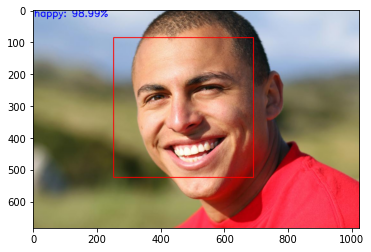